In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder ,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline,make_pipeline

In [58]:
data = pd.read_csv(r"C:\Users\shubh\Downloads\train_u6lujuX_CVtuZ9i (1).csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [59]:
data.shape

(614, 13)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [61]:
data.drop(['Loan_ID'],axis=1,inplace = True)

In [62]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [66]:
data['Gender']=data['Gender'].fillna(max(data['Gender'].value_counts().index))

In [64]:
data['Gender'].fillna(max(data['Gender'].value_counts().index))

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [67]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [68]:
### TRY : to add new class 'missing instead of misssing values in categorical feature'
### USe mean,median and mode technique when the data having missing values less than 5%


data['Married']=data['Married'].fillna(max(data['Married'].value_counts().index))
data['Dependents']=data['Dependents'].fillna(max(data['Dependents'].value_counts().index))
data['Self_Employed']=data['Self_Employed'].fillna(max(data['Self_Employed'].value_counts().index))
data['Credit_History'] = data['Credit_History'].fillna(max(data['Credit_History'].value_counts().index))
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(max(data['Loan_Amount_Term'].value_counts().index))

In [69]:
data['Dependents']=data['Dependents'].fillna(max(data['Dependents'].value_counts().index))
data['Dependents'] = data['Dependents'].str.split('').str[1].astype(int)

In [70]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())

In [71]:
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0})
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(1), int64(2), object(5)
memory usage: 55.3+ KB


In [73]:
for i in ['Gender','Married','Education','Property_Area','Self_Employed']:
    ohe = OneHotEncoder(sparse = False,drop = 'first',dtype=int)
    data[i] = ohe.fit_transform(data[[i]])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,1


In [74]:
data = data.astype(float)

In [75]:
data['Gender'].unique()

array([1., 0.])

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Gender'>

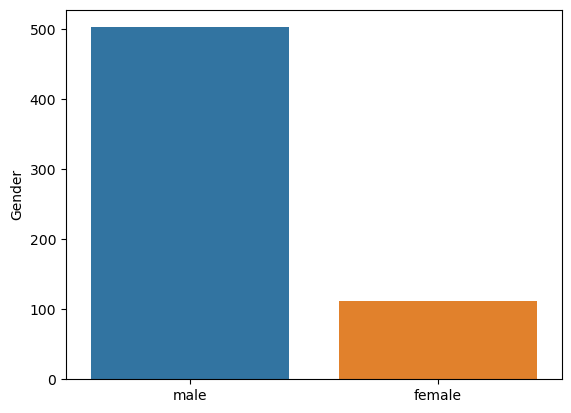

In [76]:
sns.barplot(['male','female'],data['Gender'].value_counts())

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

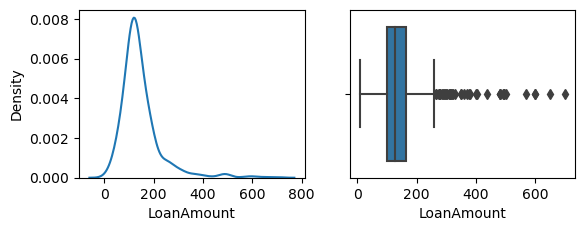

In [77]:
plt.subplot(2,2,2)
sns.boxplot(data['LoanAmount'])
plt.subplot(2,2,1)
sns.distplot(data['LoanAmount'],hist=False)

<AxesSubplot:>

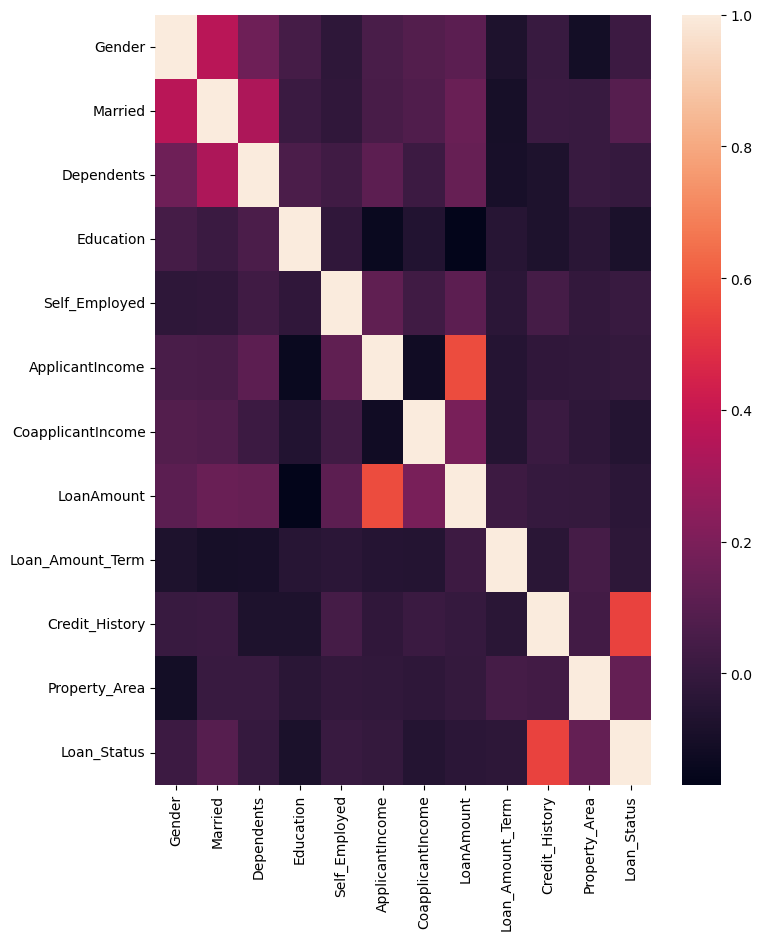

In [78]:
fig ,ax = plt.subplots(figsize=(8,10))
sns.heatmap(data.corr(),cbar=True,ax=ax)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(12)
memory usage: 57.7 KB


In [80]:
sim_acc ={}

In [81]:
sim_acc

{}

## Validation

In [82]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [84]:
scale = StandardScaler()
x_train=scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [85]:
x_train = pd.DataFrame(x_train,columns= data.columns[:-1])

In [104]:
# clf = LogisticRegression()
# clf = DecisionTreeClassifier()
# clf = RandomForestClassifier()
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [105]:
y_pred = clf.predict(x_test)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [106]:
from sklearn.metrics import confusion_matrix, classification_report

# Assume y_true and y_pred are your true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calculate specificity
specificity = tn / (tn + fp)

# Print the specificity score
print("Specificity:", specificity)
sim_acc[clf]=specificity

# You can also print the classification report to see other metrics
# print(classification_report(y_true, y_pred))

Specificity: 0.5


In [107]:
sim_acc[clf]=accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

0.7832512315270936


In [108]:
sim_acc['with_scale'+str(clf)]=accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

0.7832512315270936
